<a href="https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/Clasificadores_bayesianos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indice

[Volver al indice](https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/Indice.ipynb)


# Carga de librerias

De momento, para selección y filtrado de nuestros datos, vamso a cagar la siguiente libreria:
*   **caret:** contiene funciones para entrenar y dibujar modelos de clasificación y regresión. De esta librería Usaremos la función *confusionMatrix* para obtener la matriz de confusión
*   **dplyr:** contiene funciones para la manipulación de datos tales como filtrado por filas, selección de columnas, reordenación de filas ...


In [0]:
if (!requireNamespace("caret"))
  install.packages("caret")
library(caret)
if (!requireNamespace("dplyr"))
  install.packages("dplyr")
library(dplyr)


# Carga y visualización de datos

Cargamos nuestro datasheet a memoria.Nuestro datasheet corresponde a un conjunto de datos normalizados y preprocesados (detección de valores nulos, eliminación parcial de outliers, analisis de componentes principales)  respecto al original. 

Nuestra base de datos se basa en las mediciones realizadas por 8 sensores sobre 8 músculos con una frecuencia de 200Hz , estas mediciones se hicieron 6 veces durante 20 segundos para cada gesto, por lo tanto:
* Tenemos un total de 64 columnas, cada una para cada sensor que mide cada musculo en cada movimiento, todas ellas de tipo float con valores dentro del rango **[-128.0,127.0]**. 
* Cada *487* filas corresponden a una de las 6 mediciones realizadas por 20 segundos para cada gesto. Este medición se hizo, de principio a fin,haciendo el mismo gesto, en una posición fija, sin transiciones de ningún tipo.
* Una última columna que representa el tipo de gesto al que se corresponde la medición:
```c#
Enum {
  Roca = 0,
  Tijeras = 1,
  Papel = 2,
  Ok = 3
}
```

El objetivo de nuestro tratamiento de datos es, con todas las variables de las que disponemos (excluyendo la clase) predecir el tipo de gesto que se ha realizado.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.42838349,0.40170696,1.15012947,1.1730891,-0.04710804,-0.48219055,-4.293642,-4.24028809,-0.45983856,0.22415026,⋯,-1.7855609,3.3968017,0.39488063,1.7644141,0.7726201,0.2324183,-0.2592921,-2.2783569,1.0694782,0
2,-2.50338498,-0.44813614,-0.85390090,-0.8425861,0.73718804,-0.01724597,1.445703,-0.60602378,0.58850359,-0.28255256,⋯,-1.5876586,2.6277596,0.56147502,1.3619800,0.7726201,0.7368608,0.8365519,4.4517214,1.0050871,0
3,-0.99530940,-0.61810475,-1.45511001,-0.9769644,-1.16753100,-0.21097288,-3.097945,0.82172292,0.03674456,0.47750168,⋯,-5.4137702,0.4304965,0.64477221,0.3558947,-0.9878456,0.4005658,0.8365519,4.5704875,3.1299941,0
4,0.13574728,0.31672265,0.14811428,0.3668191,0.00891311,0.87389779,4.275519,-0.86561409,-0.84606988,-0.11365162,⋯,-2.4452353,-0.5582719,0.39488063,1.5631970,1.5851427,1.8578441,1.5410231,4.7684310,2.8080385,0
5,0.35118665,0.06176972,0.14811428,-0.1706943,-0.77538297,0.40895322,-1.981961,0.36743988,0.42297588,0.05524932,⋯,2.5682902,-1.8766298,-0.60468571,0.5571117,0.9080405,-0.7204175,-0.9246259,-4.3765578,-4.4037671,0
6,0.83592523,-0.36315183,-0.85390090,-1.9176128,0.68116689,-0.83089898,-1.463826,2.37926477,0.53332768,0.56195215,⋯,-1.6536260,0.3206333,0.56147502,1.3619800,1.5851427,0.2884675,1.1887875,-1.8428813,1.6489983,0
7,-0.61829051,-0.36315183,-0.05228875,0.6355757,-0.88742526,-0.63717207,-2.699379,-0.99540924,-0.62536627,-0.19810209,⋯,0.1274949,-1.9315614,-0.77128010,-2.2599270,-2.0712090,-0.6643683,-1.8247835,0.2949083,-1.8925134,0
8,2.34400081,0.06176972,-0.25269179,0.9043324,0.62514574,1.02887931,2.083408,1.79518657,-0.45983856,-0.11365162,⋯,2.7661925,0.8699491,0.39488063,2.1668482,3.4810288,0.5126641,0.5234537,2.9473510,3.0656030,0
9,-1.80320704,0.31672265,1.95174161,3.9950344,0.34504000,-0.94713512,-4.891490,-0.02194558,0.69885539,-0.45145350,⋯,-0.3342772,2.2981702,0.06169185,-1.8574929,-2.2066295,1.1852541,0.1320808,1.7201014,0.7475226,0


       V1                  V2                 V3                  V4          
 Min.   :-5.411816   Min.   :-8.77660   Min.   :-6.465186   Min.   :-8.63653  
 1st Qu.:-0.456711   1st Qu.:-0.27817   1st Qu.:-0.453095   1st Qu.:-0.43945  
 Median :-0.025832   Median :-0.02321   Median :-0.052289   Median :-0.03632  
 Mean   :-0.000584   Mean   :-0.00182   Mean   : 0.005197   Mean   : 0.01625  
 3rd Qu.: 0.351187   3rd Qu.: 0.31672   3rd Qu.: 0.548920   3rd Qu.: 0.36682  
 Max.   : 6.006470   Max.   : 7.28544   Max.   : 6.160205   Max.   : 5.74195  
       V5                  V6                 V7                 V8          
 Min.   :-5.593202   Min.   :-4.39547   Min.   :-5.05092   Min.   :-8.26394  
 1st Qu.:-0.551298   1st Qu.:-0.52094   1st Qu.:-0.14856   1st Qu.:-0.41133  
 Median : 0.008913   Median :-0.01725   Median : 0.01087   Median :-0.02195  
 Mean   :-0.002763   Mean   :-0.00144   Mean   : 0.01616   Mean   : 0.01074  
 3rd Qu.: 0.569125   3rd Qu.: 0.52519   3rd Qu.: 0.17029 

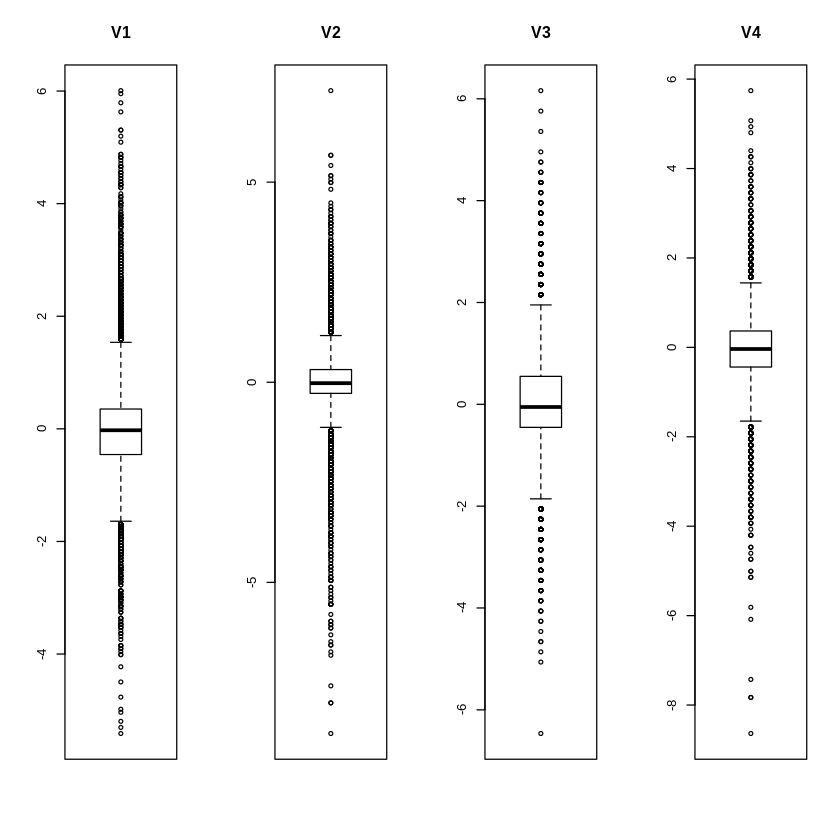

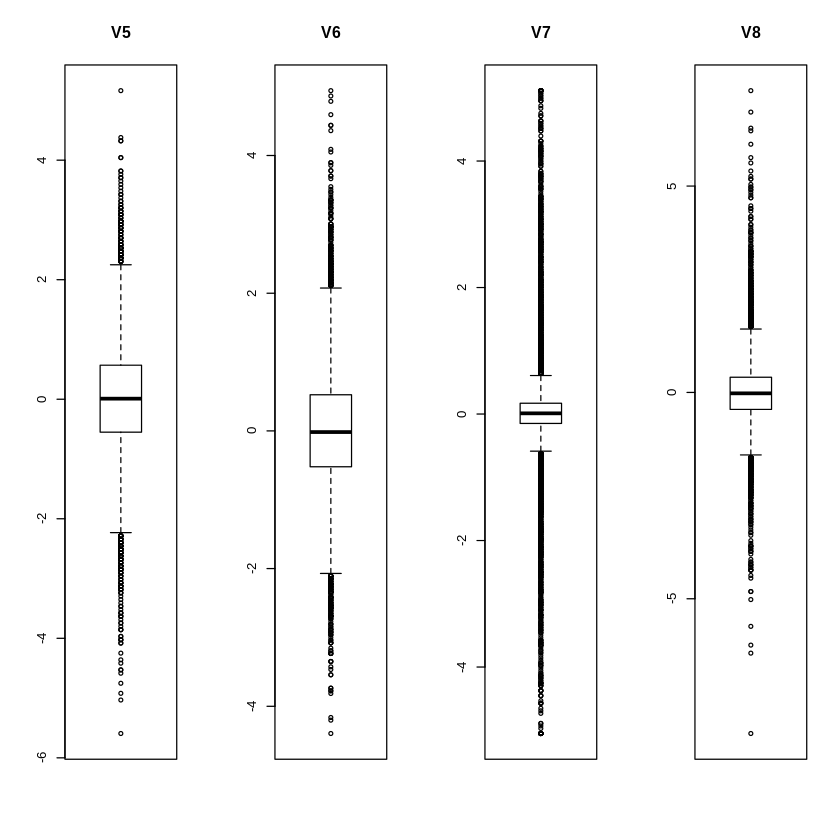

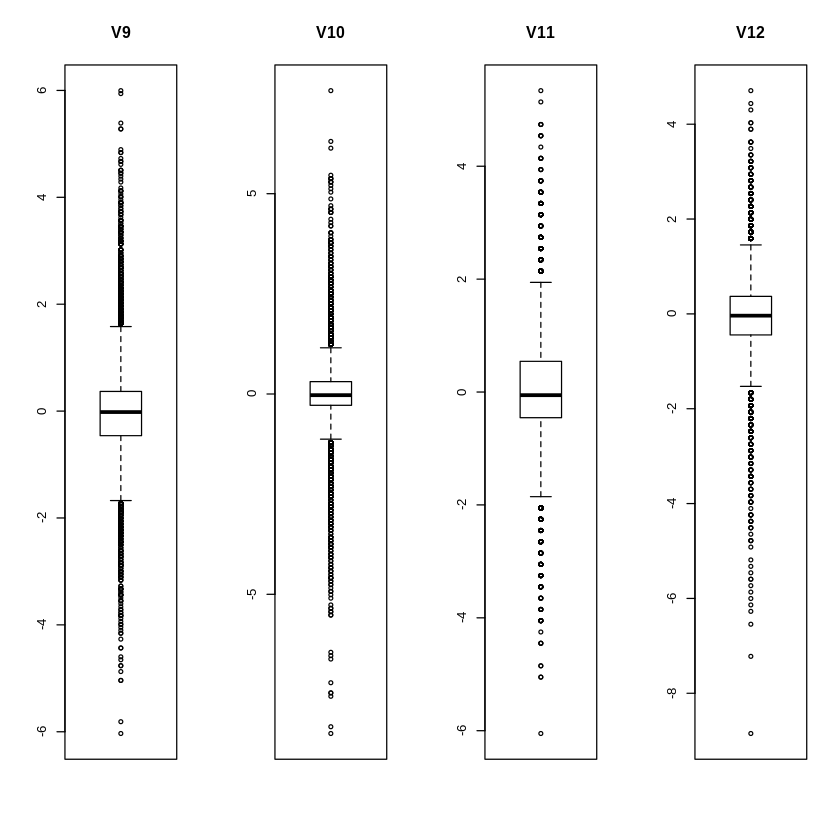

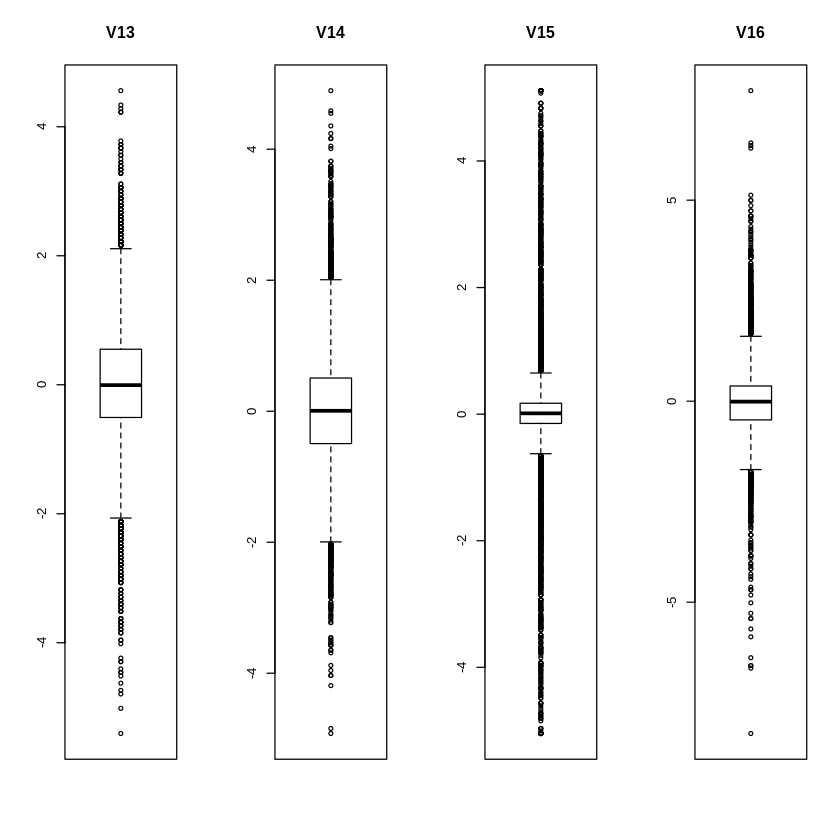

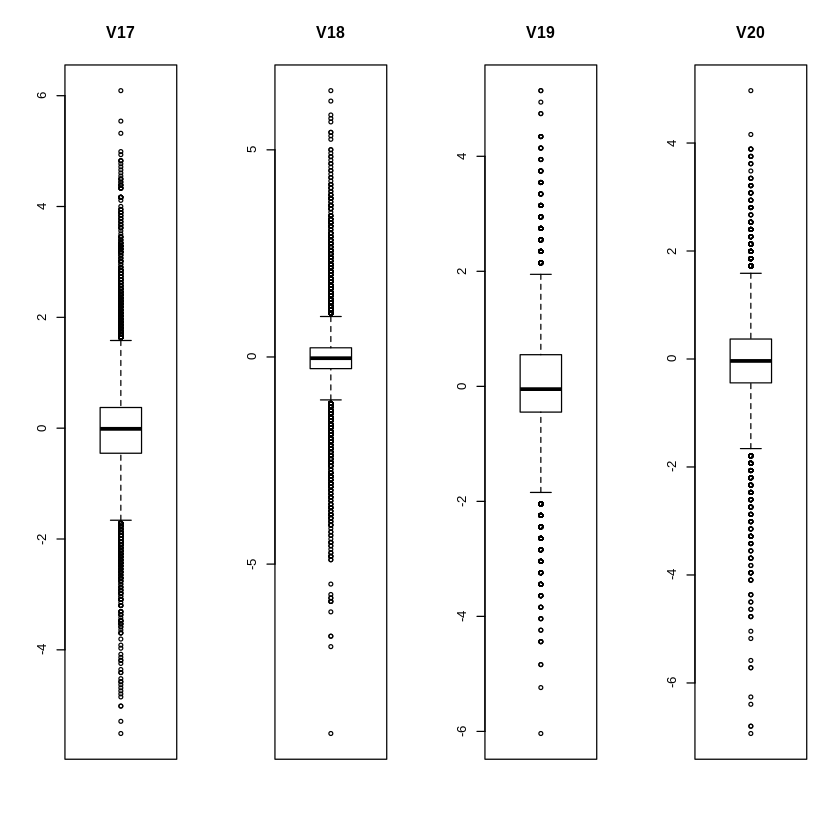

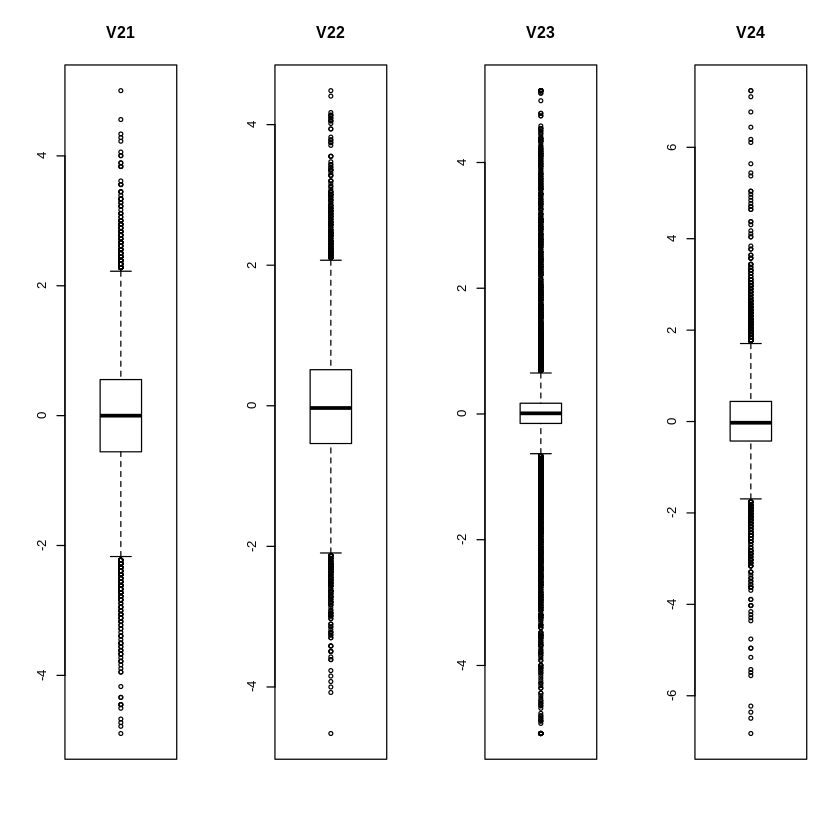

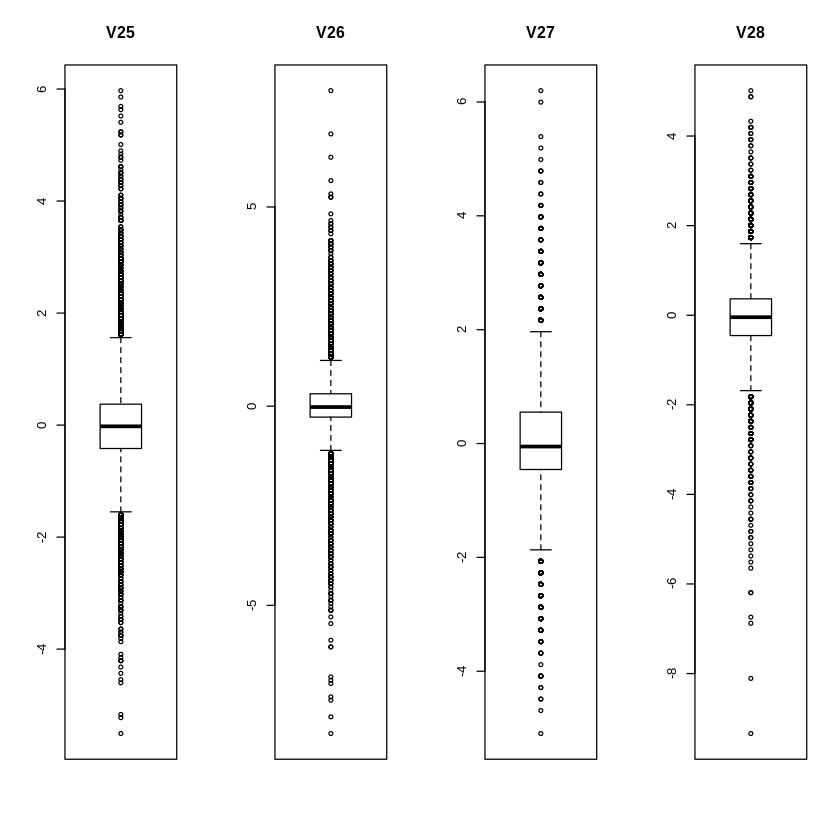

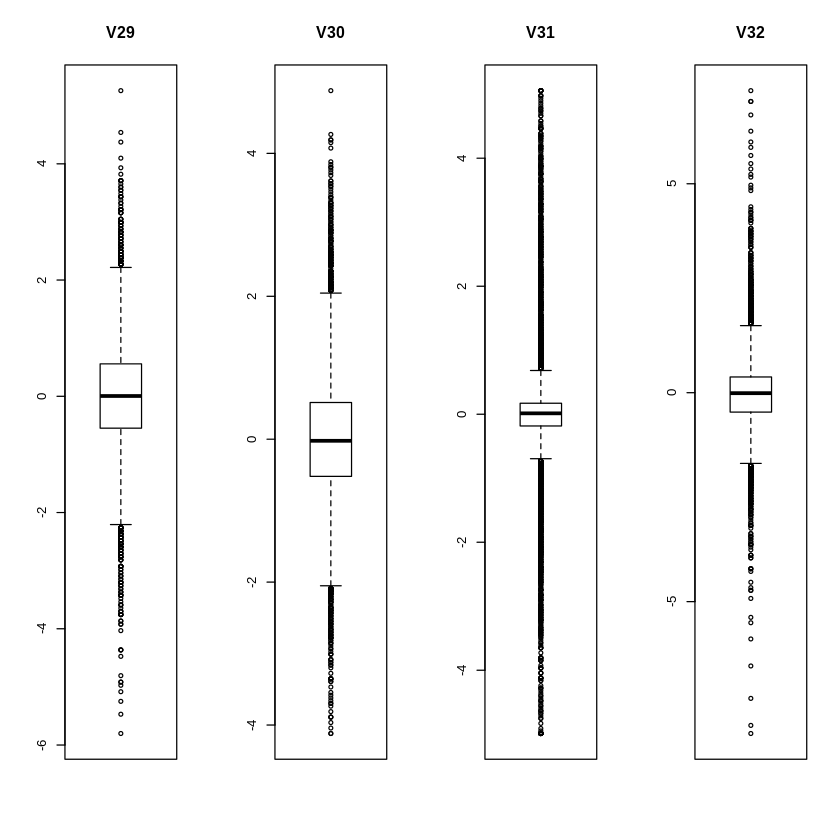

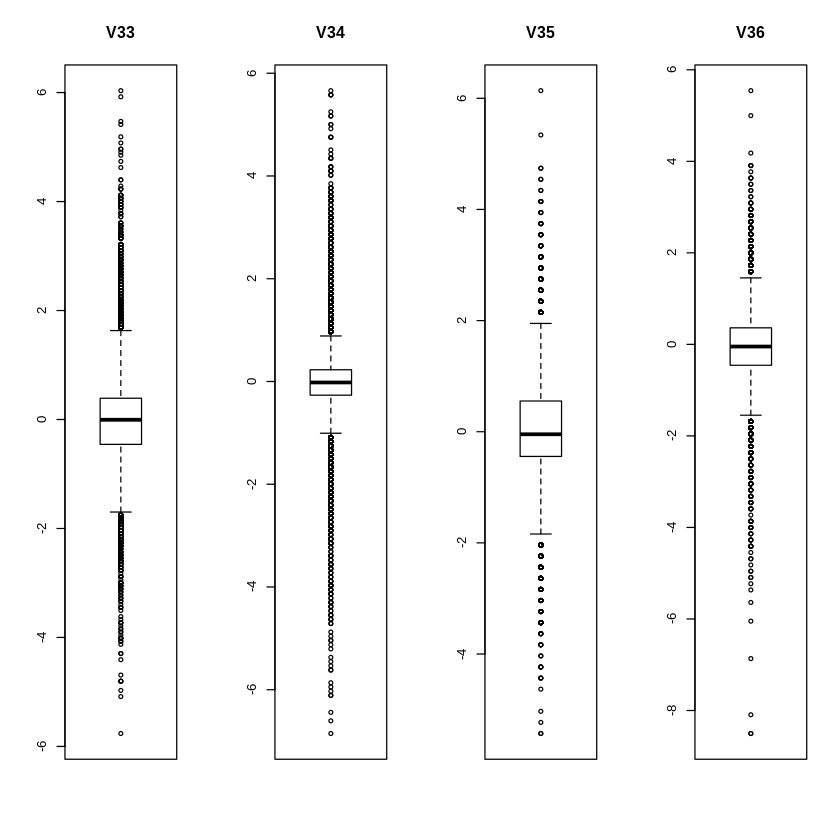

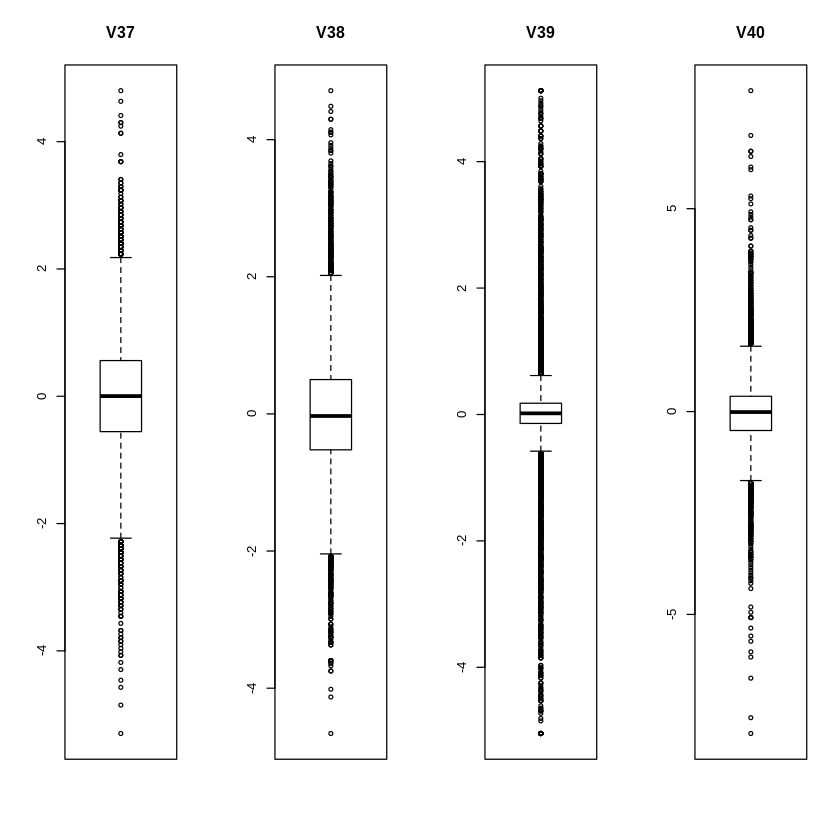

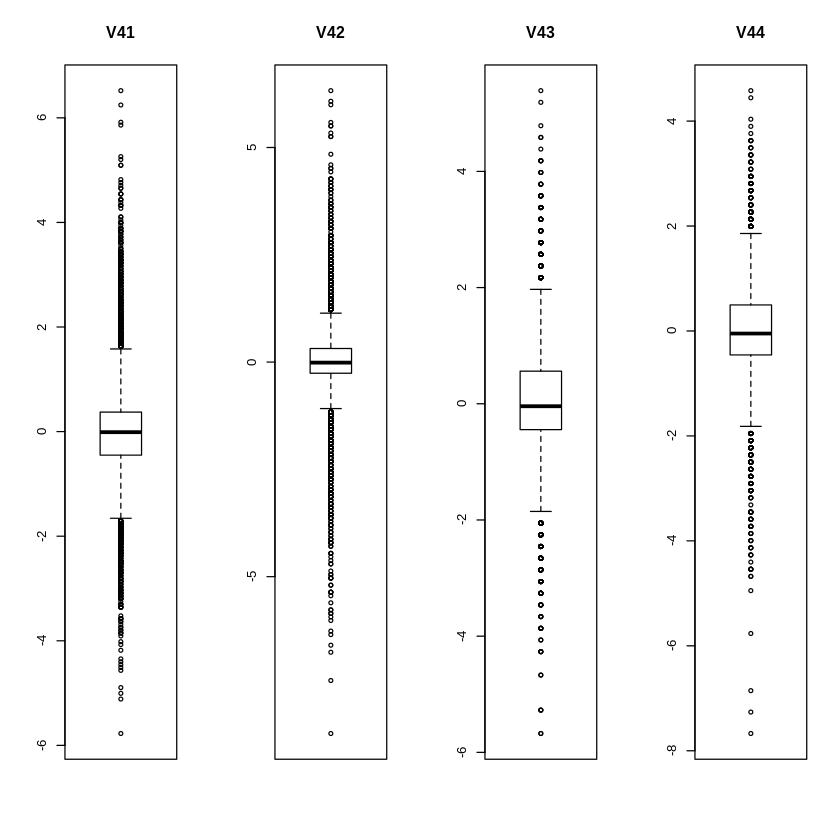

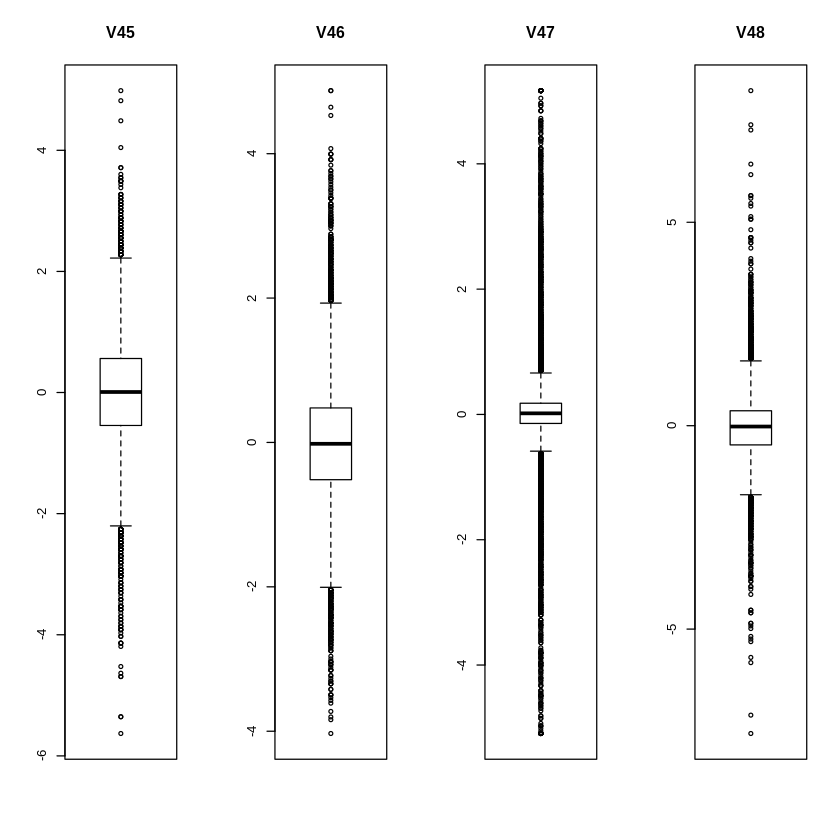

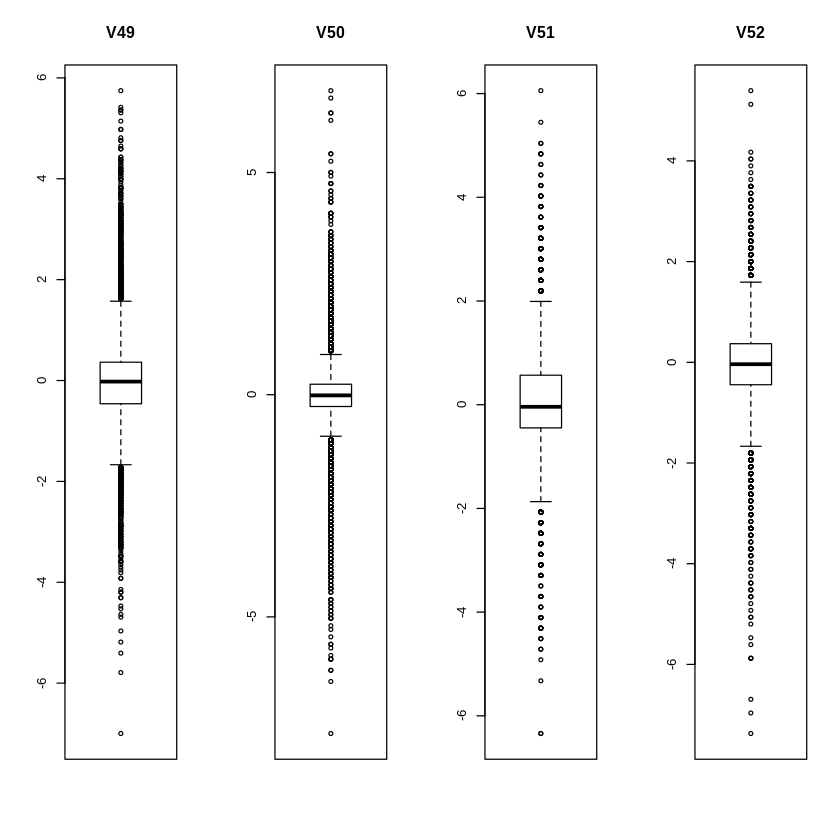

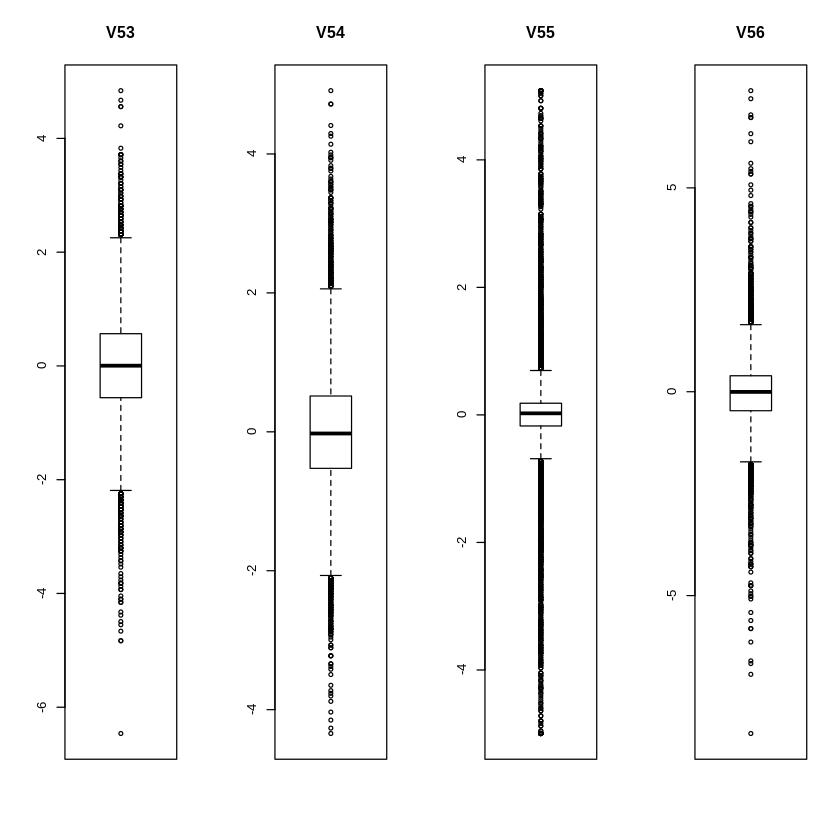

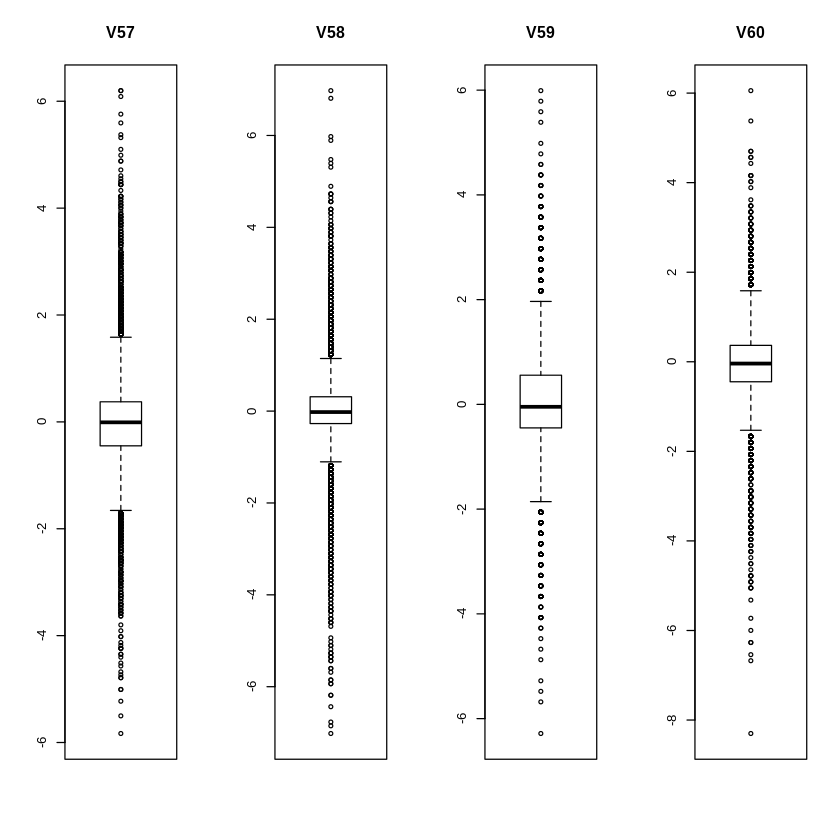

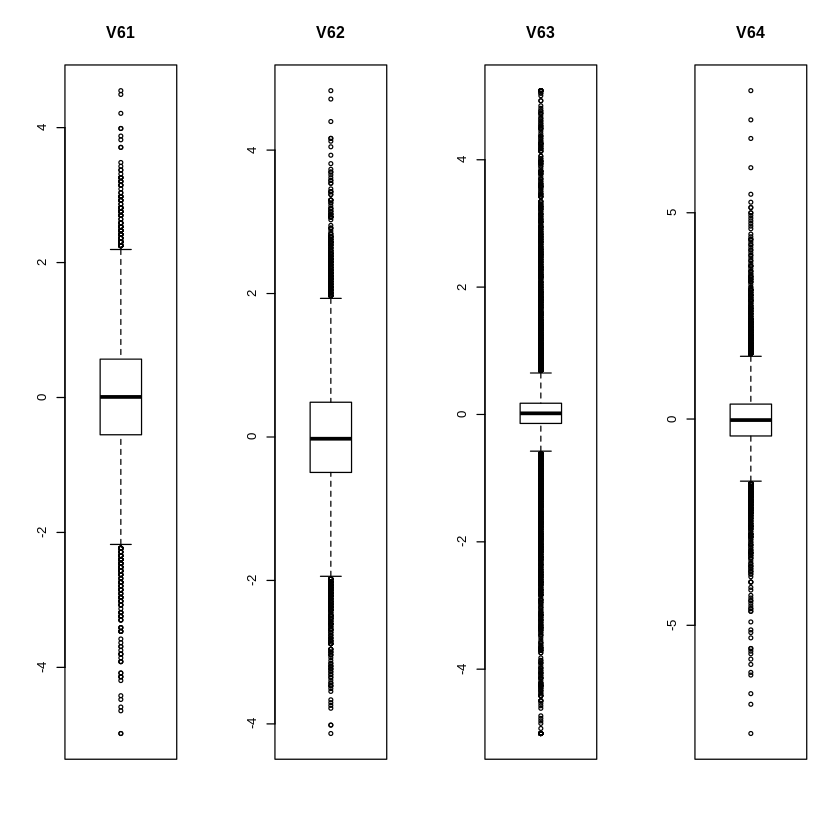

In [0]:
#Cargamos nuestros datos
#data = read.csv("/content/all.csv",header=FALSE, sep=",")
#data = read.csv("https://uc36943bfd09a58be3b54c0ce836.dl.dropboxusercontent.com/cd/0/get/A4R6OXi1GuzkFsDQE41Vj1vo8nvN3gCH8OnA41L9RZdmTUZZSz4sb7MCkkpfc1SyR9V27bcczlCjvpBJDLukItZXb1kPtwTT4PwGwNaCEL1i4ytv9tiHrGZSXI10waPGzIc/file#", header=FALSE, sep = ",")
data = read.csv("/content/cleanedAll.csv",header=FALSE, sep=",")
head(data, 10)

data$V65 <- as.factor(data$V65)
summary(data)

par(mfrow=c(1,4))
for(i in 1:64) {
  boxplot(data[,i], main=names(data)[i])
}


#Preprocesamiento de datos

Ya hicimos un preprocesado de datos , pero todavía faltaría dividir nuestros datos en 2 conjuntos, uno de entrenamiento y otro de validación, de forma que el primero sirva para crear el modelo y el segundo pueda servir para probar el modelo frente al mundo real, detectando la precisión del modelo o el posible sobreajuste de este.

In [0]:
set.seed(56)
data.entrenamiento <- sample_frac(data, 0.5) #Bajado de 0.7 a 0.5 para evitar sobreajustes
data.validacion <- setdiff(data, data.entrenamiento)

#Ejecutamos un upperSample en conjunto de entrenamiento para balancear clases
print("Antes de balanceo upperSample :")
summary(data.entrenamiento$V65)
data.entrenamiento <- upSample(data.entrenamiento, data.entrenamiento$V65)
print("Despues de balanceo upperSample :")
summary(data.entrenamiento$V65)




[1] "Antes de balanceo upperSample :"


0    1    2    3 
1315 1330 1389 1194

[1] "Despues de balanceo upperSample :"


0    1    2    3 
1389 1389 1389 1389

# **Análisis** Obtención del clasificador Bayesiano

Vamos a obtener nuestro árbol de clasificación. Antes de ello, cargamos las librerias necesarias:

*   **rsample:** contiene, entre otras, funciones para la selección aleatoria estratificada de instancia y funciones para crear distintos tipos de muestras de un conjunto de datos.
*   **e1071** que contiene funciones para obtener nuestro clasificador Bayesiano como la función **naiveBayes** .


In [0]:
if (!requireNamespace("rsample"))
  install.packages("rsample")
library(rsample)
if (!requireNamespace("e1071"))
  install.packages("e1071")
library(e1071)

Ahora, procedemos a obtener el clasificador. Cabe destacar que, cuando se trabaja con variables continuas, lo que devuelve es una tabla donde la primera columna se corresponde con la media y el segundo con la desviación estandar.

In [0]:
naive_Bayes_Model = naiveBayes(V65 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64, 
                    data=data.entrenamiento)
naive_Bayes_Model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
   0    1    2    3 
0.25 0.25 0.25 0.25 

Conditional probabilities:
   V1
Y          [,1]      [,2]
  0  0.03620933 1.3051297
  1  0.04392575 0.8654734
  2 -0.01765051 0.9181554
  3 -0.01559539 0.4717237

   V2
Y           [,1]      [,2]
  0 -0.007612716 0.7863214
  1  0.015025293 0.3367984
  2 -0.047565743 1.5198313
  3 -0.004308790 0.2767778

   V3
Y          [,1]      [,2]
  0 -0.01650765 1.0897121
  1  0.02028341 0.5577389
  2 -0.03887084 1.1955013
  3 -0.01578626 0.6028172

   V4
Y           [,1]      [,2]
  0  0.001027459 1.3306040
  1  0.002188395 0.5125099
  2  0.014474968 0.7081902
  3 -0.006228392 0.5562281

   V5
Y          [,1]      [,2]
  0  0.02766749 0.6830963
  1 -0.05384348 1.2428174
  2 -0.01109156 1.0016232
  3 -0.05259319 0.8879146

   V6
Y           [,1]      [,2]
  0  0.037120294 0.6244684
  1 -0.030774779 0.8531731
  2  0.0037585

Ya tenemos nuestro clasificador Bayesiano ahora vamos a probar su presición

# Evaluación

Generamos las predicciones según nuestro clasificador Bayesiano y las comparamos con nuestro conjunto de validación para crear la matriz de confusión y calcular estadisticas que puntuan su precisión

In [0]:
nB_predictions = predict(naive_Bayes_Model, newdata=data.validacion, type="class")
confusionMatrix(nB_predictions, data.validacion$V65)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3
         0 1250    0   11    6
         1    1 1317   34   51
         2   12   19 1289   25
         3   41   26   35 1110

Overall Statistics
                                          
               Accuracy : 0.9501          
                 95% CI : (0.9438, 0.9558)
    No Information Rate : 0.2619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9334          
                                          
 Mcnemar's Test P-Value : 2.722e-07       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            0.9586   0.9670   0.9416   0.9312
Specificity            0.9957   0.9777   0.9855   0.9747
Pos Pred Value         0.9866   0.9387   0.9584   0.9158
Neg Pred Value         0.9864   0.9882   0.9794   0.9796
Prevalence             0.2495   0.2606   0.2619   0.2280
Detection Rate      

El modelo devuelve una precisión del 95%, una precisión que mejora la obtenida con el modelo anterior, el árbol de clasificación. Un resultado sorprendente gracias , sobretodo, al preprocesamiento de datos realizado sobre los datos originales, donde se normalizarón los datos y se eliminaron outliers . 

Si se ejecuta el mismo procedimiento pero frente al conjunto de datos sin preprocesar, este modelo devuelve una precisión del ~88%